In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("Online+Retail.csv", encoding= 'unicode_escape')

In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
135960,547920,22082,RIBBON REEL STRIPES DESIGN,2,28-03-2011 12:52,1.65,14730.0,United Kingdom
135961,547920,85053,FRENCH ENAMEL CANDLEHOLDER,3,28-03-2011 12:52,2.10,14730.0,United Kingdom
135962,547920,82482,WOODEN PICTURE FRAME WHITE FINISH,3,28-03-2011 12:52,2.55,14730.0,United Kingdom
135963,547920,47566,PARTY BUNTING,1,28-03-2011 12:52,4.95,14730.0,United Kingdom


In [ ]:
#####3 Variables ---RFM:Recency, Frequency, Monetary
###Monetary###
data['Sales']=data['UnitPrice']*data['Quantity']


In [ ]:
monetary=data.groupby('CustomerID')['Sales'].sum().reset_index()

In [ ]:
monetary

,CustomerID,Sales
0,12346.0,0.00
1,12347.0,1187.18
2,12348.0,1120.24
3,12350.0,334.40
4,12352.0,601.18
...,...,...
2128,18270.0,111.95
2129,18273.0,51.00
2130,18277.0,-12.75
2131,18280.0,180.60


In [ ]:
#####Frequency######
frequency=data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

In [ ]:
frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,2
2,12348.0,2
3,12350.0,1
4,12352.0,8
...,...,...
2128,18270.0,1
2129,18273.0,1
2130,18277.0,1
2131,18280.0,1


In [ ]:
#####Recency#####
data1=data.copy()
data1=data1[~data1.InvoiceDate.isin(['07-03-','20-05'])]
data1['InvoiceDate']=pd.to_datetime(data1['InvoiceDate'],format='mixed')

In [ ]:
data1['recency']=(pd.to_datetime(data1['InvoiceDate'].max())-pd.to_datetime(data1['InvoiceDate'])).dt.days

In [ ]:
recency=data1.groupby(['CustomerID'])['recency'].min().reset_index()

In [ ]:
recency

,CustomerID,recency
0,12346.0,3356
1,12347.0,3348
2,12348.0,3349
3,12350.0,3341
4,12352.0,3293
...,...,...
2128,18270.0,3297
2129,18273.0,3288
2130,18277.0,3349
2131,18280.0,3190


In [ ]:
data_cluster=recency.merge(frequency,on='CustomerID').merge(monetary,on='CustomerID')

In [ ]:
data_cluster

,CustomerID,recency,InvoiceNo,Sales
0,12346.0,3356,2,0.00
1,12347.0,3348,2,1187.18
2,12348.0,3349,2,1120.24
3,12350.0,3341,1,334.40
4,12352.0,3293,8,601.18
...,...,...,...,...
2128,18270.0,3297,1,111.95
2129,18273.0,3288,1,51.00
2130,18277.0,3349,1,-12.75
2131,18280.0,3190,1,180.60


In [ ]:
####Checking missing values#####
data_cluster.isnull().sum()

CustomerID    0
recency       0
InvoiceNo     0
Sales         0
dtype: int64

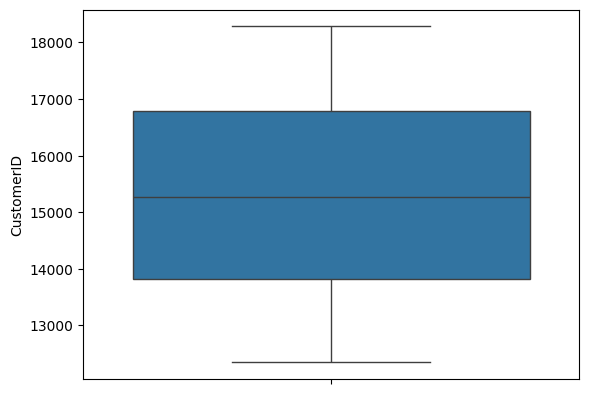

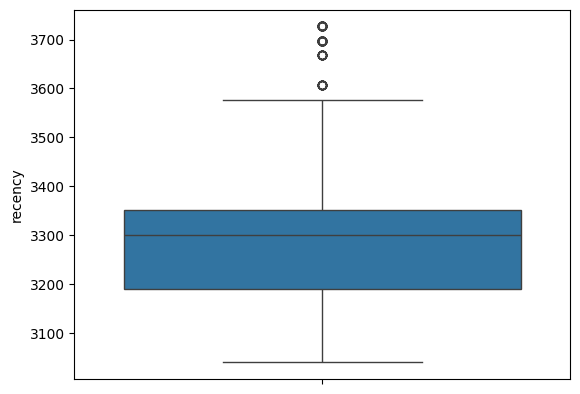

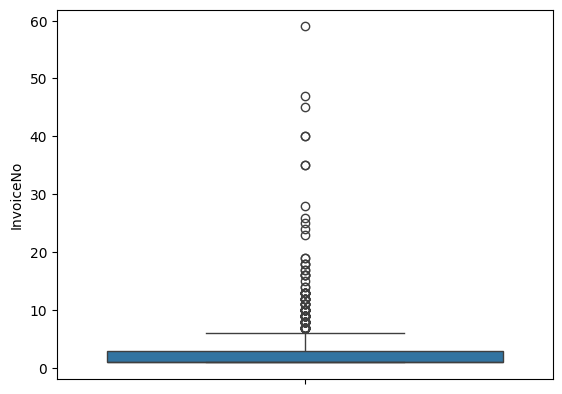

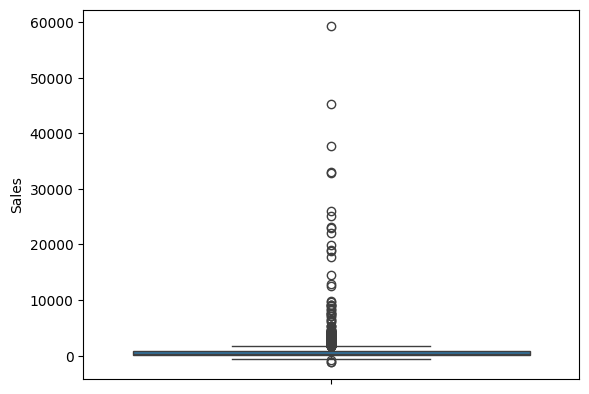

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in data_cluster.columns:
  sns.boxplot(data_cluster[i])
  plt.show()

In [ ]:
data_cluster.describe()

,CustomerID,recency,InvoiceNo,Sales
count,2133.000000,2133.000000,2133.000000,2133.000000
mean,15285.571496,3292.191280,2.584623,913.239916
std,1726.317439,148.805866,3.538715,2700.649351
min,12346.000000,3039.000000,1.000000,-1192.200000
25%,13817.000000,3190.000000,1.000000,198.800000
50%,15260.000000,3299.000000,1.000000,376.740000
75%,16779.000000,3350.000000,3.000000,827.180000
max,18283.000000,3727.000000,59.000000,59228.880000


In [ ]:
data_cluster.rename(columns={"InvoiceNo":"frequency"},inplace=True)

<ipython-input-23-784dd8e2a450>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cluster[x] , bins=10)
<ipython-input-23-784dd8e2a450>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cluster[x] , bins=10)
<ipython-input-23-784dd8e2a450>:7: UserWarning: 

`distplot` is a deprecated fun

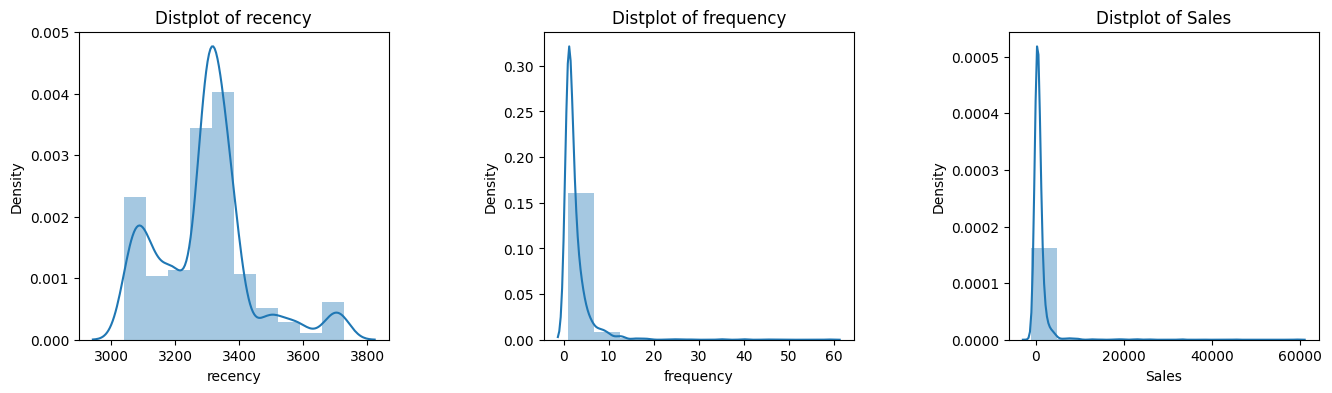

In [ ]:
plt.figure(1, figsize=(16,4))
n = 0
for x in ['recency'	,'frequency','Sales']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(data_cluster[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

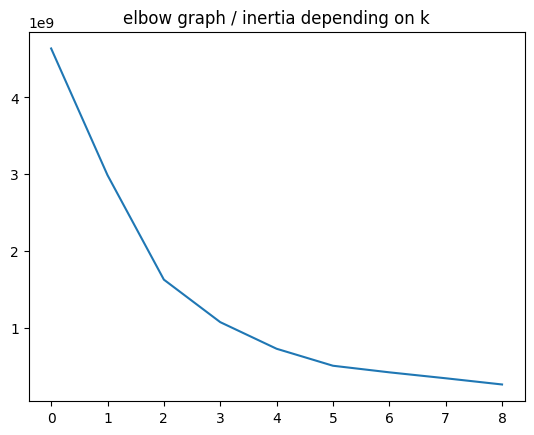

In [ ]:
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

X = data_cluster.drop('CustomerID',axis=1)
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
   # km_scores.append(silhouette_score(X, km.labels_))

sns.lineplot( km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

In [ ]:
km = KMeans(n_clusters=3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Profiles of customers
X['label'] = km.labels_

In [ ]:
set(km.labels_)


{0, 1, 2}

In [ ]:
X

,recency,frequency,Sales,label
0,3356,2,0.00,0
1,3348,2,1187.18,0
2,3349,2,1120.24,0
3,3341,1,334.40,0
4,3293,8,601.18,0
...,...,...,...,...
2128,3297,1,111.95,0
2129,3288,1,51.00,0
2130,3349,1,-12.75,0
2131,3190,1,180.60,0


In [ ]:
for k in range(3):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
           recency    frequency        Sales
count  2018.000000  2018.000000  2018.000000
mean   3299.863231     2.155104   531.649093
min    3039.000000     1.000000 -1192.200000
max    3727.000000    26.000000  2555.800000



cluster nb : 1
           recency  frequency         Sales
count    14.000000  14.000000     14.000000
mean   3114.357143  18.428571  28800.384286
min    3039.000000   2.000000  17713.670000
max    3253.000000  45.000000  59228.880000



cluster nb : 2
           recency   frequency         Sales
count   101.000000  101.000000    101.000000
mean   3163.554455    8.970297   4671.955347
min    3039.000000    1.000000   2602.430000
max    3515.000000   59.000000  14478.420000



